In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('./student_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   class       1044 non-null   object
 2   sex         1044 non-null   object
 3   age         1044 non-null   int64 
 4   address     1044 non-null   object
 5   famsize     1044 non-null   object
 6   Pstatus     1044 non-null   object
 7   Medu        1044 non-null   int64 
 8   Fedu        1044 non-null   int64 
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  1044 non-null   int64 
 14  studytime   1044 non-null   int64 
 15  failures    1044 non-null   int64 
 16  schoolsup   1044 non-null   object
 17  famsup      1044 non-null   object
 18  paid        1044 non-null   object
 19  activities  1044 non-null   object
 20  nursery 

# 2.1 Data Quality Report

In [3]:
cat_features = ['school', 'class', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 
                'schoolsup' ,'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
cont_features = ['age', 'absences', 'G3']

cat_df = df[cat_features]
cont_df = df[cont_features]

In [4]:
# Cat. Feature Data Quality Report
# Feature feature
cat_dq_report = pd.DataFrame(cat_df.columns.values)
cat_dq_report.columns = ['Feature']
cat_dq_report = cat_dq_report.reindex(columns = cat_dq_report.columns.tolist() + 
                                      ['Count', 'Miss %', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %'])

# Count feature
cat_dq_report['Count'] = cat_df.shape[0]

for i, feature in enumerate(cat_dq_report['Feature']):
    cat_dq_report.iloc[i:i+1, 2] = cat_df[feature].isna().sum() / cat_df.shape[0] # Miss %
    
    mode_info_df =  cat_df[feature].value_counts().reset_index()
    
    cat_dq_report.iloc[i:i+1, 3] = mode_info_df['index'].shape[0] # Card. feature
    cat_dq_report.iloc[i:i+1, 4] = mode_info_df.at[0, 'index'] # Mode
    cat_dq_report.iloc[i:i+1, 5] = mode_info_df.at[0, feature] # Mode Freq.
    cat_dq_report.iloc[i:i+1, 7] = mode_info_df.at[1, 'index'] # 2nd Mode
    cat_dq_report.iloc[i:i+1, 8] = mode_info_df.at[1, feature] # 2nd Mode Freq.

# Deriving mode % for first and second mode
cat_dq_report['Mode %'] = cat_dq_report['Mode Freq.'] / cat_dq_report['Count'] * 100
cat_dq_report['2nd Mode %'] = cat_dq_report['2nd Mode Freq.'] / cat_dq_report['Count'] * 100

cat_dq_report.head()

,Feature,Count,Miss %,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,school,1044,0.0,2.0,GP,772.0,73.946360,MS,272.0,26.053640
1,class,1044,0.0,2.0,por,649.0,62.164751,mat,395.0,37.835249
2,sex,1044,0.0,2.0,F,591.0,56.609195,M,453.0,43.390805
3,address,1044,0.0,2.0,U,759.0,72.701149,R,285.0,27.298851
4,famsize,1044,0.0,2.0,GT3,738.0,70.689655,LE3,306.0,29.310345


In [5]:
# Cont. Feature Data Quality Report
# Feature feature
cont_dq_report = pd.DataFrame(cont_df.columns.values)
cont_dq_report.columns = ['Feature']

cont_desc = cont_df[cont_dq_report['Feature']].describe()

# Turning rows of cont_desc into columns of our data quality report
for i, row in enumerate(list(cont_desc.index.values)):
    cont_dq_report[row] = cont_desc[i:i+1][:].T.values

cont_dq_report['% Miss.'] = 0
for i, feature in enumerate(cont_dq_report['Feature']):
    cont_dq_report.iloc[i:i+1, 1] = cont_df[feature].isna().sum() / cont_df.shape[0] # Miss %

# Cardinality feature
cont_dq_report['Card.'] = df[cont_dq_report['Feature']].nunique().values

cont_dq_report = cont_dq_report[['Feature', 'count', '% Miss.', 'Card.', 'min', '25%', 'mean', '50%', '75%', 'max', 'std']]
cont_dq_report.rename({'count': 'Count', 'min': 'Min.', '25%': '1st Qrt.', 'mean': 'Mean', '50%': 'Median', '75%': '3rd Qrt.', 'max': 'Max.', 'std': 'Std. Dev.'}, axis=1, inplace=True)
cont_dq_report.head()

,Feature,Count,% Miss.,Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
0,age,0.0,0,8,15.0,16.0,16.726054,17.0,18.0,22.0,1.239975
1,absences,0.0,0,35,0.0,0.0,4.434866,2.0,6.0,75.0,6.210017
2,G3,0.0,0,19,0.0,10.0,11.341954,11.0,14.0,20.0,3.864796


# 2.1.2 Data Visualizations 

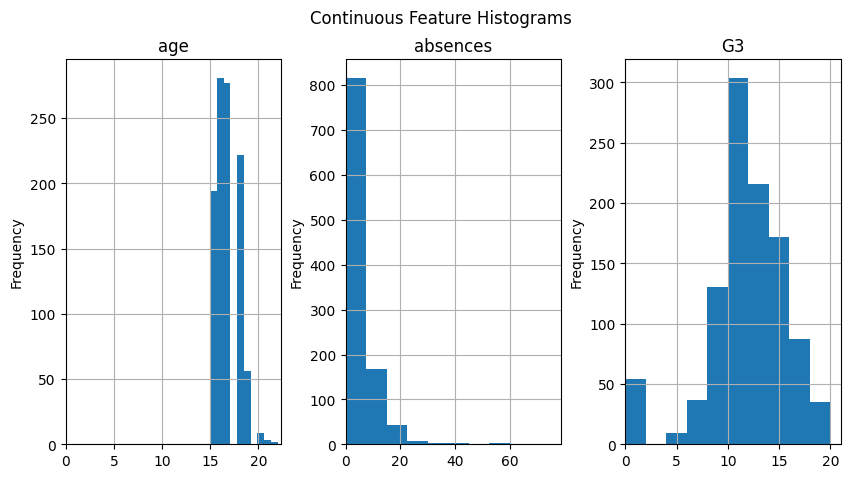

In [6]:
# Continuous Feature Histograms
fig, axes = plt.subplots(1, 3, figsize=(10,5))

fig.suptitle("Continuous Feature Histograms")
for i, feature in enumerate(cont_features):
    cont_df.hist(feature, ax=axes[i])
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(xmin=0)

plt.show()

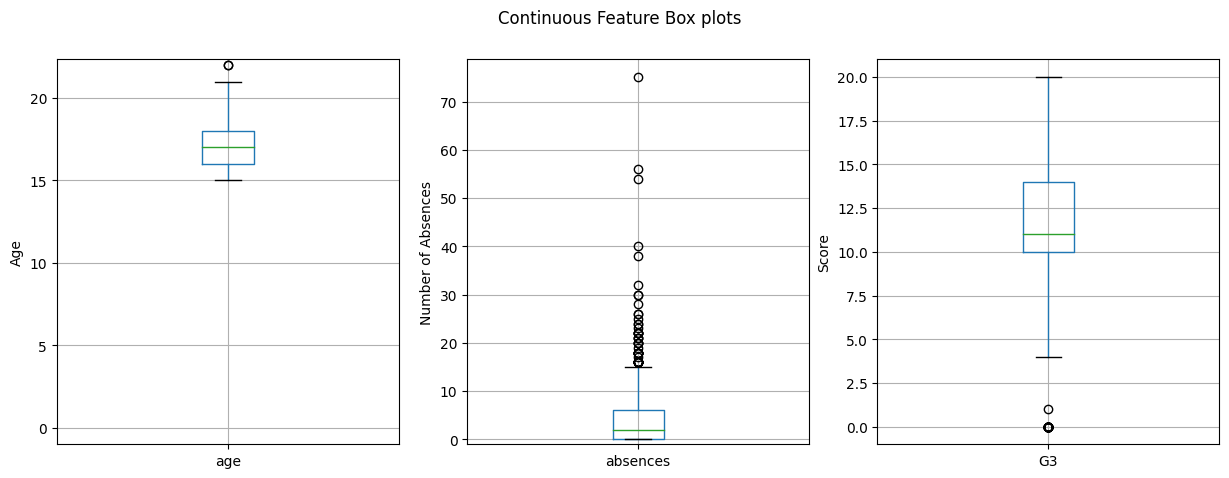

In [15]:
# Continuous Feature Box Plots
fig, axes = plt.subplots(1, 3, figsize=(15,5))
plt.suptitle('Continuous Feature Box plots')

for i, feature in enumerate(cont_features):
    cont_df.boxplot(feature, ax=axes[i])
    axes[i].set_ylim(ymin=-1)

axes[0].set_ylabel('Age')
axes[1].set_ylabel('Number of Absences')
axes[2].set_ylabel('Score')

plt.show()

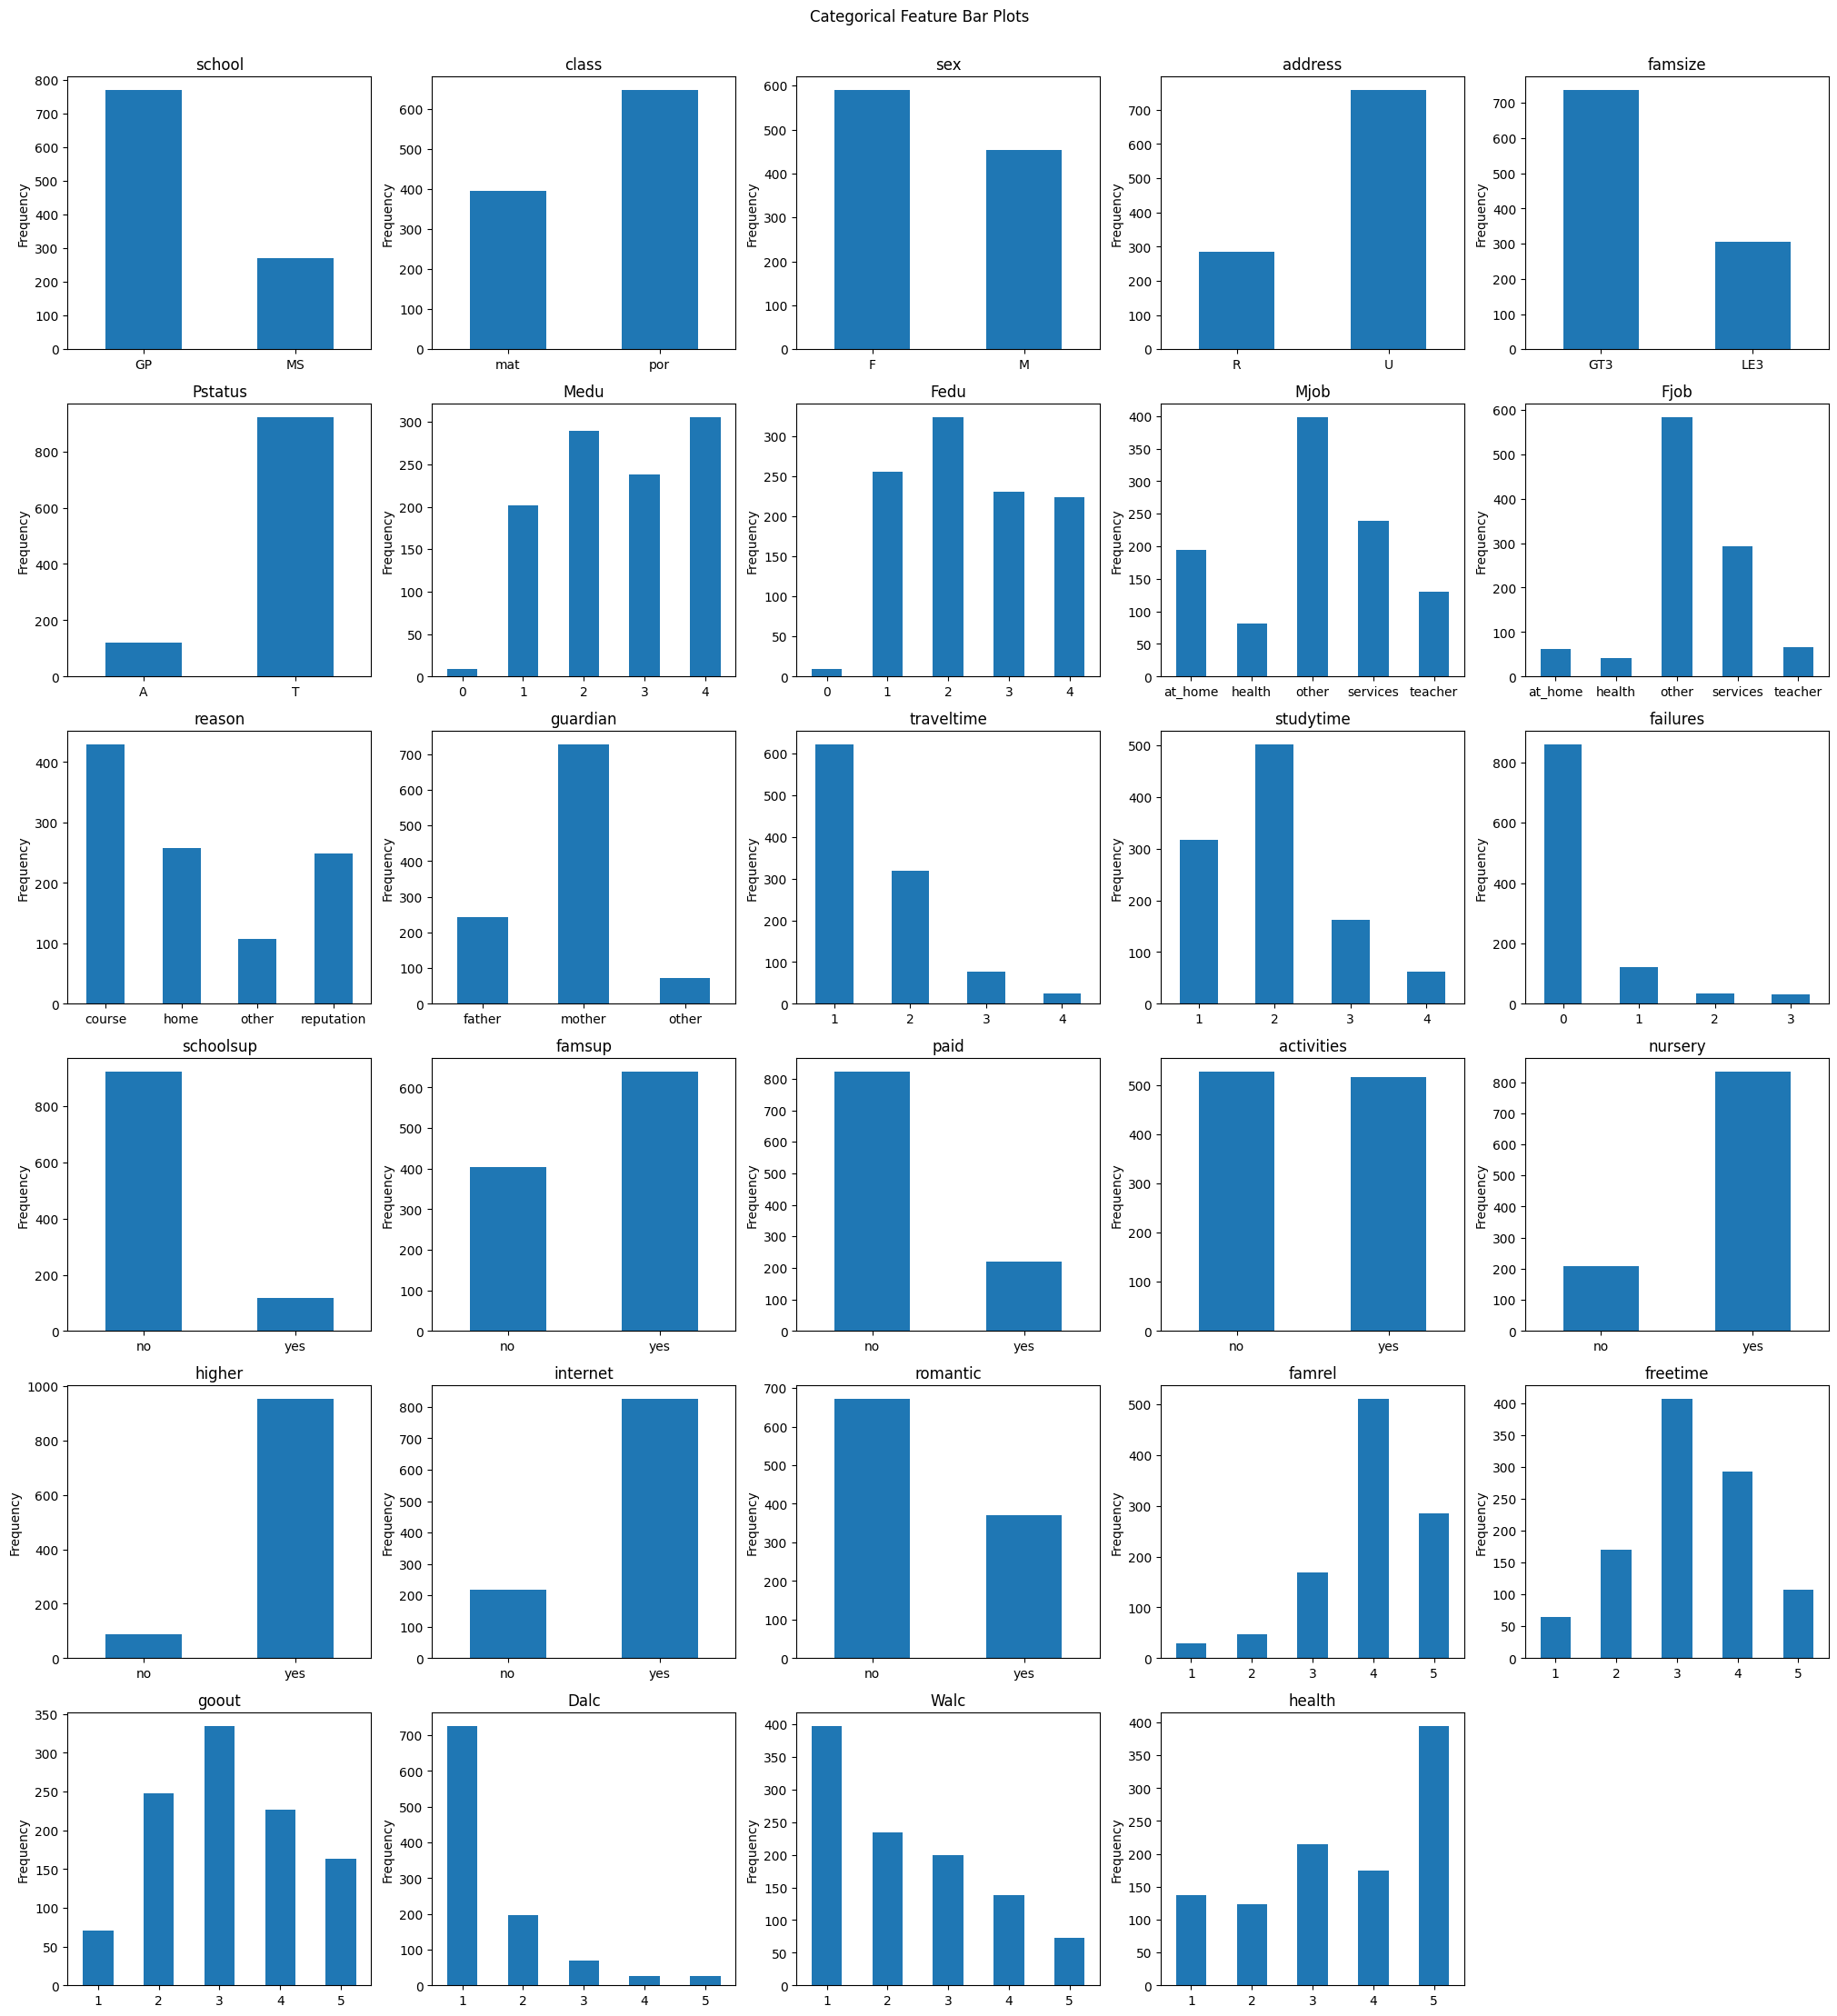

In [14]:
# Categorical Feature Bar Plots
fig = plt.figure(figsize=(25, 25))

fig.suptitle("Categorical Feature Bar Plots")
# Adjusting white space under title
fig.tight_layout()
fig.subplots_adjust(top=0.95)

for i in range(1,30):
    ax = fig.add_subplot(6, 5, i)
    feature = cat_features[i-1]
    plt.title(feature)
    ax = cat_df[feature].value_counts().sort_index().plot(kind='bar')
    plt.xticks(rotation=0)
    plt.ylabel('Frequency')

plt.show()